In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'W:\Pandas\Student Study Performance\study_performance.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.columns.to_list()

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [6]:
df = df.rename(columns = {'gender': 'Gender',
                     'race_ethnicity': 'Ethnicity',
                     'parental_level_of_education': 'Parents Education',
                     'lunch': 'Lunch Type',
                     'test_preparation_course': 'Test Preparation Course',
                     'math_score': 'Math score',
                     'reading_score': 'Physics Score',
                     'writing_score': 'Chemistry Score'})

In [7]:
df.columns

Index(['Gender', 'Ethnicity', 'Parents Education', 'Lunch Type',
       'Test Preparation Course', 'Math score', 'Physics Score',
       'Chemistry Score'],
      dtype='object')

In [8]:
df[['Math score', 'Physics Score', 'Chemistry Score']].describe()

,Math score,Physics Score,Chemistry Score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


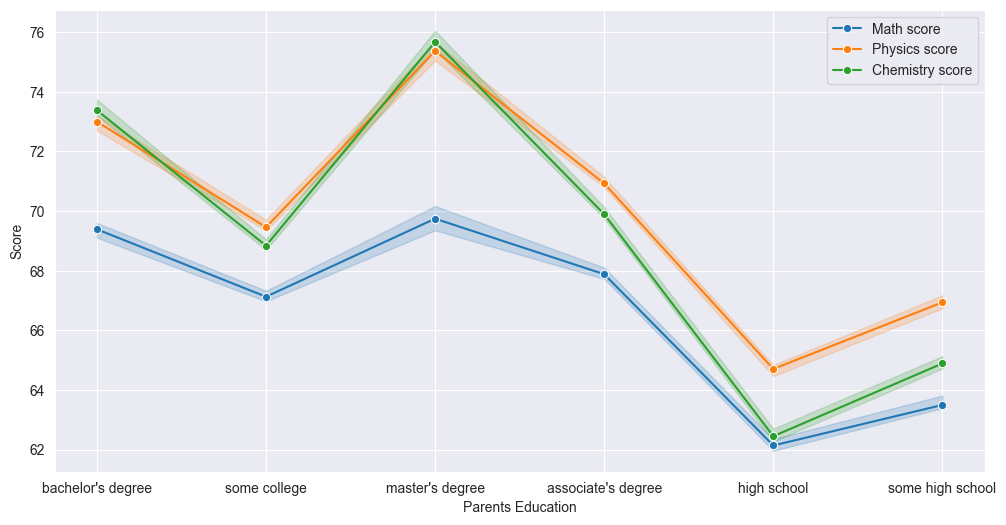

In [21]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
sns.lineplot(data = df, x = 'Parents Education', y = 'Math score', label = 'Math score' , marker='o' ,errorbar=('ci', 15))
sns.lineplot(data = df, x = 'Parents Education', y = 'Physics Score', label = 'Physics score' , marker='o' ,errorbar=('ci', 15))
sns.lineplot(data = df, x = 'Parents Education', y = 'Chemistry Score', label = 'Chemistry score' , marker='o' ,errorbar=('ci', 15))
#plt.xlabel()
plt.ylabel('Score')
plt.grid(True)

In [10]:
ethicity_melted = df.melt(id_vars=['Ethnicity','Gender'],
    value_vars=['Math score', 'Physics Score', 'Chemistry Score'],
    var_name='Subject',
    value_name = 'Score')

ethicity_melted.head()

,Ethnicity,Gender,Subject,Score
0,group B,female,Math score,72
1,group C,female,Math score,69
2,group B,female,Math score,90
3,group A,male,Math score,47
4,group C,male,Math score,76


<Figure size 1200x800 with 0 Axes>

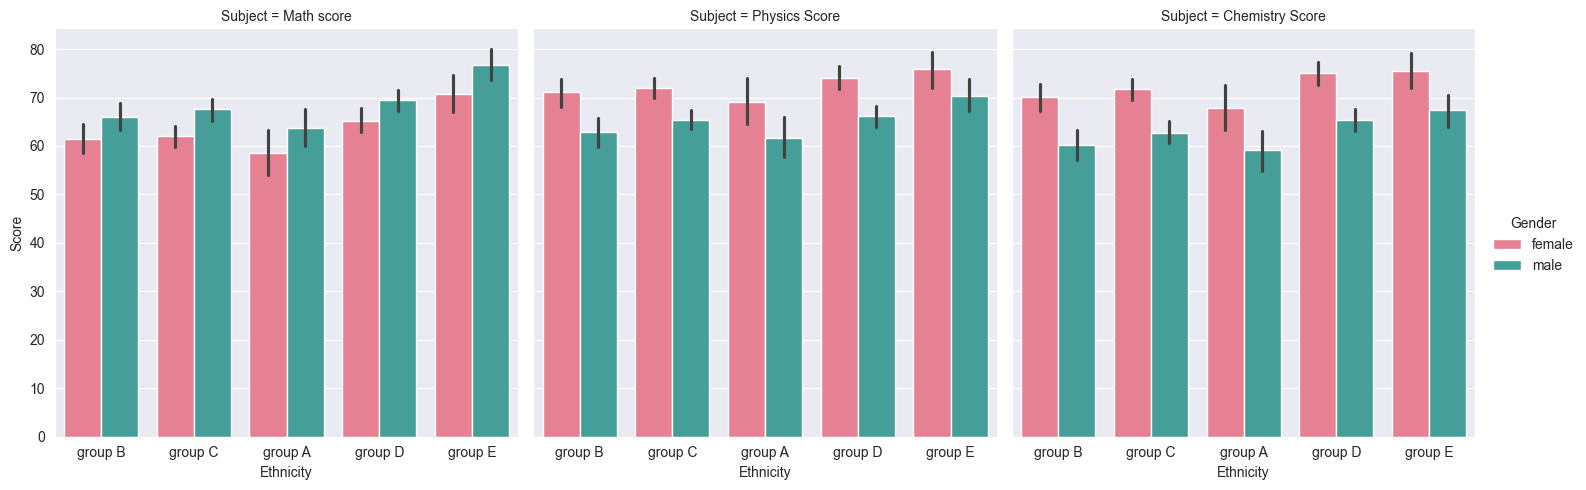

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
sns.catplot(data=ethicity_melted, x='Ethnicity', y='Score', hue='Gender', col='Subject', kind='bar', palette='husl')


In [12]:
df['Test Preparation Course'].unique()

array(['none', 'completed'], dtype=object)

In [13]:
#df['Test Preparation Course'] = df['Test Preparation Course'].replace({'none': 'Not Completed',
#                                         'completed': 'Completed'})
#test_course = df.melt(id_vars=['Test Preparation Course', 'Gender'],
#                    value_vars=['Math score', 'Physics Score', 'Chemistry Score'],
#                    var_name= 'subject',
#                     value_name = 'score')
#test_course.head()

<Axes: xlabel='Test Preparation Course', ylabel='Math score'>

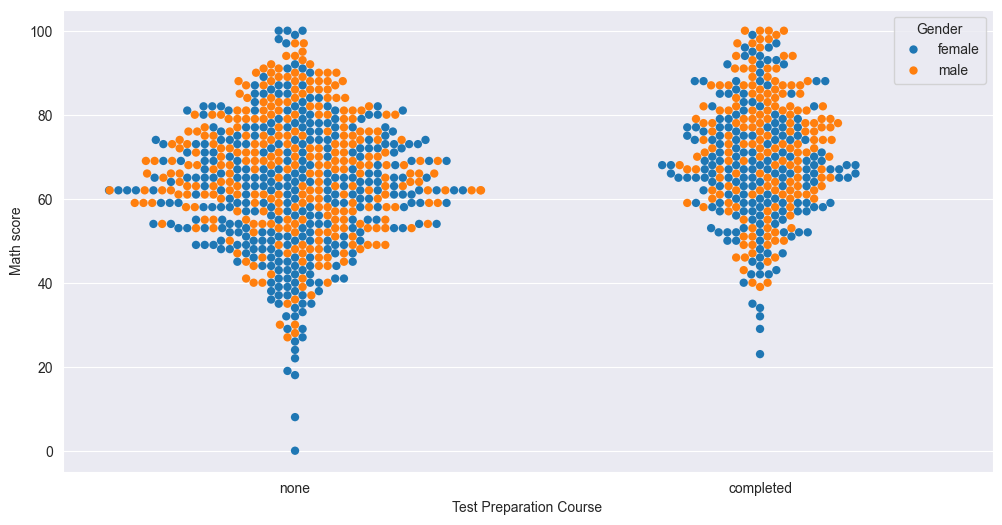

In [14]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Test Preparation Course', y='Math score', 
            hue='Gender', size=6)

<Axes: xlabel='Test Preparation Course', ylabel='Physics Score'>

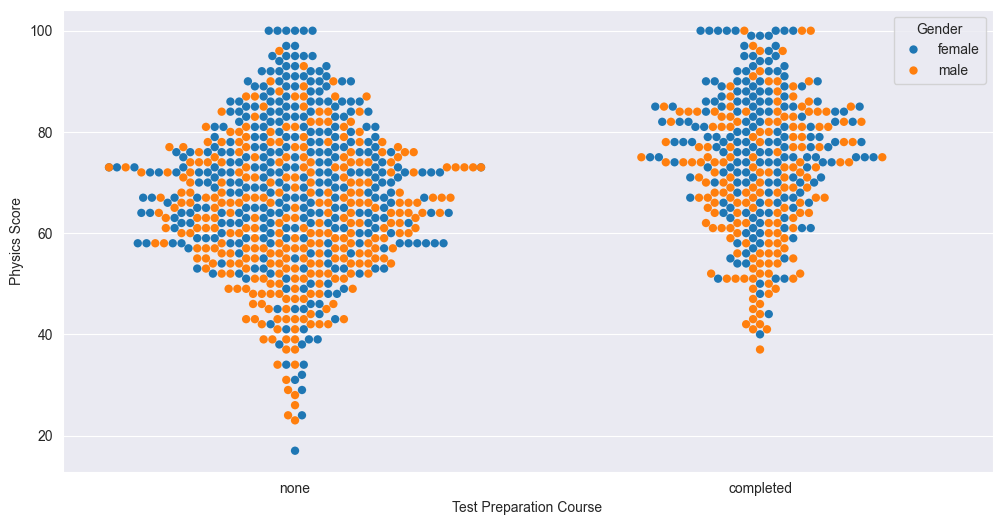

In [15]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Test Preparation Course', y='Physics Score', hue='Gender', size=6)

<Axes: xlabel='Test Preparation Course', ylabel='Chemistry Score'>

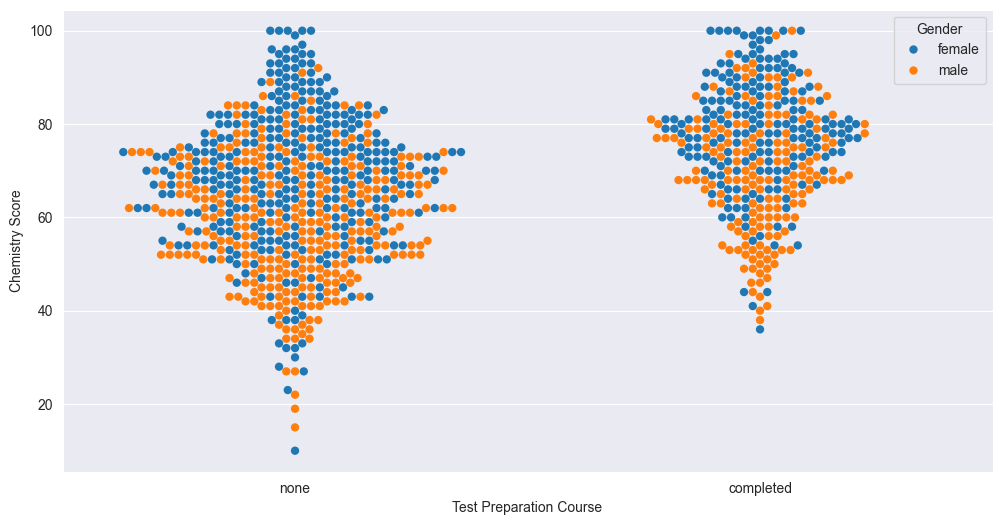

In [16]:
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Test Preparation Course', y='Chemistry Score', hue='Gender', size=6)

In [17]:
df['Lunch Type'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [18]:
lunch_melt = df.melt(id_vars=['Lunch Type', 'Gender'],
                    value_vars=['Math score', 'Physics Score', 'Chemistry Score'],
                    var_name= 'subject',
                     value_name = 'score')
lunch_melt.head()

,Lunch Type,Gender,subject,score
0,standard,female,Math score,72
1,standard,female,Math score,69
2,standard,female,Math score,90
3,free/reduced,male,Math score,47
4,standard,male,Math score,76


<Figure size 1200x600 with 0 Axes>

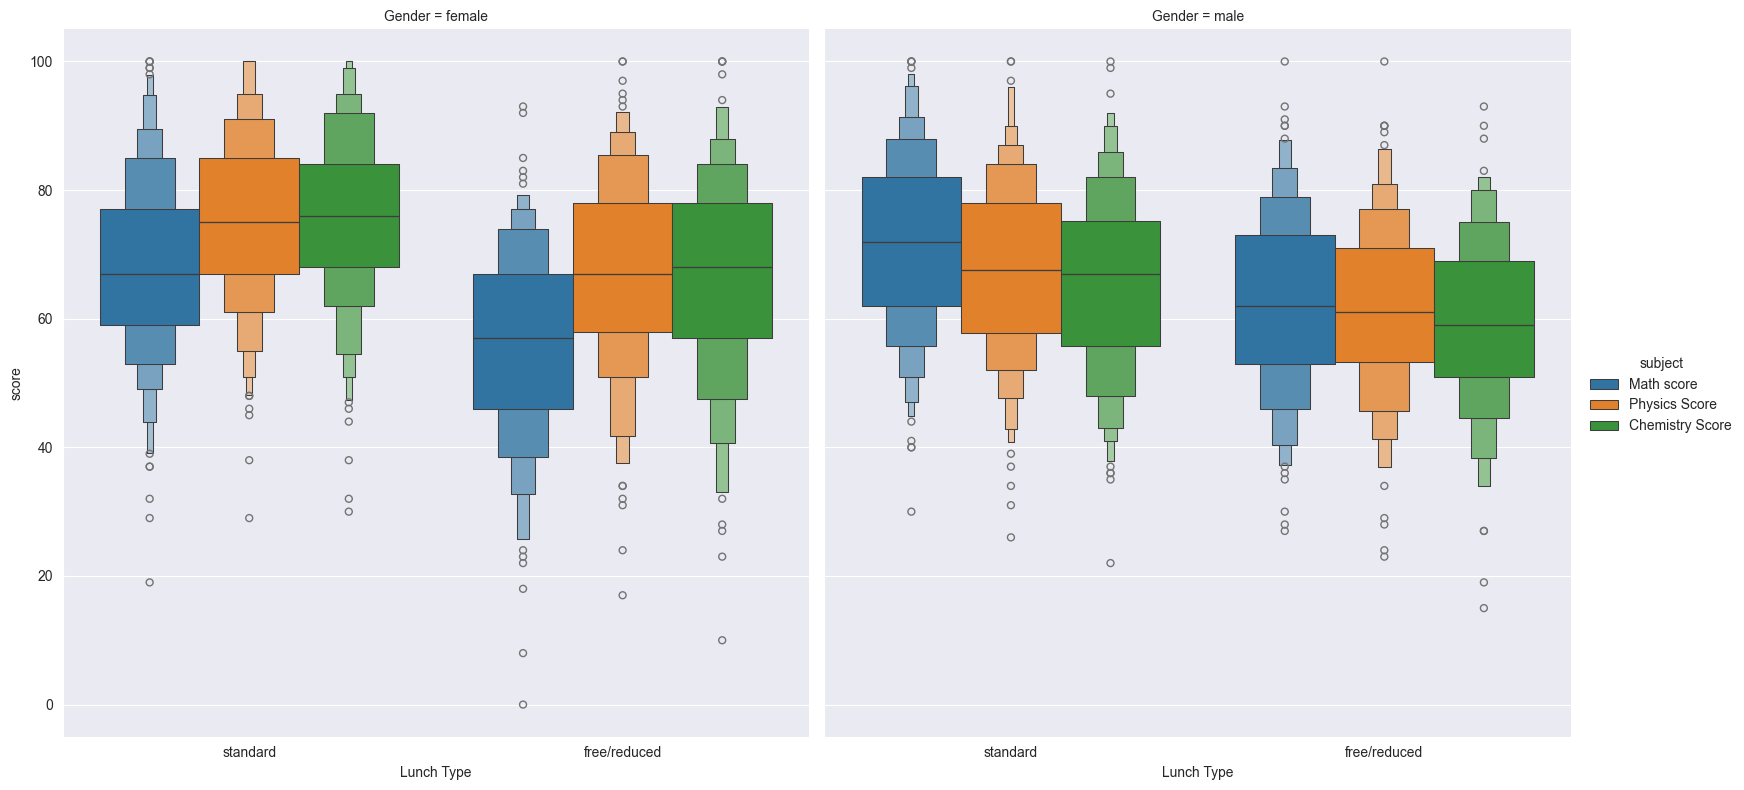

In [19]:
plt.figure(figsize=(12,6))
sns.catplot(kind='boxen', data=lunch_melt, 
            x = 'Lunch Type', y='score', hue='subject', col='Gender',
            height=8, aspect=1)